## IMPORTS

In [ ]:
## LIBRARY IMPORTS ##

# main imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from google.colab import drive

from scipy import stats as stats
import statistics
import datetime as datetime
import time

# from Linear Time Series Modeling
from sklearn.model_selection import train_test_split
# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Decompose time series into trend, seasonal, and residual components.
from statsmodels.tsa.seasonal import seasonal_decompose
# Import the autocorrelation function (ACF) plot.
from statsmodels.graphics.tsaplots import plot_acf
# Import the partial autocorrelation function (PACF) plot
from statsmodels.graphics.tsaplots import plot_pacf
# Import statsmodels.(to be added to main imports)
import statsmodels.api as sm
# Import R2 score and MSE.
from sklearn.metrics import r2_score, mean_squared_error

#from ARIMA Modeling
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller
# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
# warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# from VAR Modeling(advanced time series)
from statsmodels.tsa.api import VAR
# Import dates_from_str and convert "quarterly" into dates.
from statsmodels.tsa.base.datetools import dates_from_str

# from handson-ml2
# Is this notebook running on Colab or Kaggle?
#IS_COLAB = "google.colab" in sys.modules
#IS_KAGGLE = "kaggle_secrets" in sys.modules


#if not tf.config.list_physical_devices('GPU'):
#    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
#    if IS_COLAB:
#        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
#    if IS_KAGGLE:
#        print("Go to Settings > Accelerator and select GPU.")


#from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, LogisticRegression, LogisticRegressionCV
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
#from sklearn.metrics import mean_squared_error, r2_score, plot_roc_curve, roc_auc_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
#from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
#from sklearn.pipeline import Pipeline
#from sklearn.naive_bayes import MultinomialNB, BernoulliNB

#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
#from nltk.stem.porter import PorterStemmer
#from nltk.corpus import stopwords
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk.corpus import stopwords

#import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Mounts the google drive to Colab Notebook

drive.mount('/drive')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# Historical balance sheet data

In [ ]:
master_rollup = pd.read_csv('/drive/My Drive/Colab Notebooks/project05_data/financials_rollup.csv', index_col='reportPeriod', infer_datetime_format=True)
master_rollup

,Ticker,Sector,Year,Month,Quarter,assets,cashAndEquivalents,shareholdersEquity,totalLiabilities,propertyPlantEquipmentNet,shares,tangibleAssetValue,Biofuels_Prod,Biofuels_Cons,Total_Biomass_Energy_Prod,Total_Biomass_Energy_Cons,Geothermal_Energy_Cons/Prod,Hydroelectric_Power_Cons/Prod,Solar/PV_Energy_Cons/Prod,Wood_Energy_Prod,Wood_Energy_Cons,Waste_Energy_Cons,Wind_Energy_Cons/Prod,Coal_Prod,Coal_Cons,Crude_Prod,Petro_Cons,Natural_Gas(dry)_Prod,Natural_Gas_Cons,Nucler_Power_Cons/Prod,Tot_FF_Prod,Tot_FF_Cons,Tot_Primary_Prod,Tot_Primary_Cons,Tot_Renew_Prod,Tot_Renew_Cons,Elec_Gen_Coal,Elec_Gen_Nat_Gas,Elec_Gen_Petroleum,Elec_Gen_Nuclear,Elec_Gen_Solar,Elec_Gen_Wind,Elec_Gen_Hydro,Elec_Gen_Other,Elec_FF_Ttl,Elec_Renew_Ttl,Elec_FF_Pct,Elec_Renew_Pct,totalVolumeQtr,trailingVolume1yr,trailingVolume9mo,trailingVolume6mo,avgSharePrice,totalReturnPctYr,totalReturnPct9mo,totalReturnPct6mo,totalReturnPct3mo
reportPeriod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6/30/11,AMRC,Diversified,2011,6,2,6.606000e+08,69300000,219300000,441200000,155100000,43100000,6.400000e+08,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,0,0,0,0,0,0,0,0,0,0,0.00,0.00,16000000,0,0,0,0.0,0.00,0.0,0.00,0.00
6/30/11,AMSC,Wind,2011,6,2,3.937000e+08,140300000,259700000,133900000,98600000,5100000,3.870000e+08,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,0,0,0,0,0,0,0,0,0,0,0.00,0.00,16530000,0,0,0,0.0,0.00,0.0,0.00,0.00
6/30/11,D,Diversified,2011,6,2,4.341100e+10,381000000,11680000000,31474000000,27651000000,569200000,4.027000e+10,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,0,0,0,0,0,0,0,0,0,0,0.00,0.00,143640000,0,0,0,0.0,0.00,0.0,0.00,0.00
6/30/11,FSLR,Solar,2011,6,2,4.939200e+09,532200000,3681500000,1257700000,1728000000,86300000,4.480400e+09,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,0,0,0,0,0,0,0,0,0,0,0.00,0.00,117400000,0,0,0,0.0,0.00,0.0,0.00,0.00
6/30/11,FTEK,Hydroelectric,2011,6,2,1.029000e+08,30600000,87600000,15300000,14000000,24300000,7.600000e+07,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,0,0,0,0,0,0,0,0,0,0,0.00,0.00,7420000,0,0,0,0.0,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/20,RUN,Wind,2020,12,4,6.306800e+09,276100000,1033500000,4378200000,5052700000,119400000,9.227000e+08,558,524,1228,1166,55,563,257,562,533,108,846,2688,2363,5704,8315,8696,8198,1994,18815,18871,23759,23792,2949,2886,198580000,331570000,5750000,191610000,16170000,94460000,63490000,18700000,727490000,192820000,0.79,0.21,405760000,760350000,658230000,461580000,47.9,0.02,0.0,0.17,0.03
12/31/20,SEDG,Solar,2020,12,4,2.437100e+09,827100000,1085800000,1351400000,345000000,49200000,8.775000e+08,558,524,1228,1166,55,563,257,562,533,108,846,2688,2363,5704,8315,8696,8198,1994,18815,18871,23759,23792,2949,2886,198580000,331570000,5750000,191610000,16170000,94460000,63490000,18700000,727490000,192820000,0.79,0.21,98710000,320380000,233840000,140740000,47.9,0.02,0.0,0.17,0.03
12/31/20,SPWR,Solar,2020,12,4,1.449300e+09,324700000,-10300000,1456400000,155300000,168400000,-1.140000e+07,558,524,1228,1166,55,563,257,562,533,108,846,2688,2363,5704,8315,8696,8198,1994,18815,18871,23759,23792,2949,2886,198580000,331570000,5750000,191610000,16170000,94460000,63490000,18700000,727490000,192820000,0.79,0.21,564570000,1586020000,1209310000,758430000,47.9,0.02,0.0,0.17,0.03


In [ ]:
master_rollup.index

Index(['6/30/11', '6/30/11', '6/30/11', '6/30/11', '6/30/11', '6/30/11',
       '6/30/11', '6/30/11', '6/30/11', '6/30/11',
       ...
       '12/31/20', '12/31/20', '12/31/20', '12/31/20', '12/31/20', '12/31/20',
       '12/31/20', '12/31/20', '12/31/20', '12/31/20'],
      dtype='object', name='reportPeriod', length=742)

In [ ]:
master_rollup['reportPeriod'] = pd.to_datetime(master_rollup['reportPeriod'])

KeyError: ignored

In [ ]:
master_rollup.dtypes

Ticker                                   object
Sector                                   object
Year                                      int64
Month                                     int64
Quarter                                   int64
reportPeriod                     datetime64[ns]
assets                                  float64
cashAndEquivalents                        int64
shareholdersEquity                        int64
totalLiabilities                          int64
propertyPlantEquipmentNet                 int64
shares                                    int64
tangibleAssetValue                      float64
Biofuels_Prod                             int64
Biofuels_Cons                             int64
Total_Biomass_Energy_Prod                 int64
Total_Biomass_Energy_Cons                 int64
Geothermal_Energy_Cons/Prod               int64
Hydroelectric_Power_Cons/Prod             int64
Solar/PV_Energy_Cons/Prod                 int64
Wood_Energy_Prod                        

In [ ]:
master_rollup['Oil_Cons/Prod'] = master_rollup['Petro_Cons'] / master_rollup['Crude_Prod']
master_rollup['Coal_Cons/Prod'] = master_rollup['Coal_Cons'] / master_rollup['Coal_Prod']
master_rollup['Wood_Cons/Prod'] = master_rollup['Wood_Energy_Cons'] / master_rollup['Wood_Energy_Prod']
master_rollup['Nat_Gas_Cons/Prod'] = master_rollup['Natural_Gas_Cons'] / master_rollup['Natural_Gas(dry)_Prod']
master_rollup['Tot_FF_Cons/Prod'] = master_rollup['Tot_FF_Cons'] / master_rollup['Tot_FF_Prod']
master_rollup['Tot_Renew_Cons/Prod'] = master_rollup['Tot_Renew_Cons'] / master_rollup['Tot_Renew_Prod']
master_rollup['Tot_Primary_Cons/Prod'] = master_rollup['Tot_Primary_Cons'] / master_rollup['Tot_Primary_Prod']
master_rollup['Biofuels_Cons/Prod'] =  master_rollup['Biofuels_Cons'] / master_rollup['Biofuels_Prod']
master_rollup['Dollar_Volume_Qtr'] =  master_rollup['totalVolumeQtr'] * master_rollup['avgSharePrice']
master_rollup['Dollar_Volume_Trailing'] =  master_rollup['trailingVolume1yr'] * master_rollup['avgSharePrice']


master_cols = ['reportPeriod', 'Ticker', 'Sector', 'Year', 'Month', 'Quarter', 'assets',
       'cashAndEquivalents', 'shareholdersEquity', 'totalLiabilities',
       'propertyPlantEquipmentNet', 'shares', 'tangibleAssetValue',
        'Geothermal_Energy_Cons/Prod', 'Hydroelectric_Power_Cons/Prod',
        'Solar/PV_Energy_Cons/Prod', 'Oil_Cons/Prod', 'Coal_Cons/Prod', 'Wood_Cons/Prod',
        'Nat_Gas_Cons/Prod', 'Tot_FF_Cons/Prod', 'Tot_Renew_Cons/Prod', 'Wind_Energy_Cons/Prod',
        'Nucler_Power_Cons/Prod', 'Tot_Primary_Cons/Prod', 'Elec_Gen_Coal', 'Elec_Gen_Nat_Gas',
        'Elec_Gen_Petroleum', 'Elec_Gen_Nuclear', 'Elec_Gen_Solar',
       'Elec_Gen_Wind', 'Elec_Gen_Hydro', 'Elec_Gen_Other', 'Elec_FF_Ttl',
       'Elec_Renew_Ttl', 'Elec_FF_Pct', 'Elec_Renew_Pct', 'totalVolumeQtr',
       'trailingVolume1yr', 'avgSharePrice', 'totalReturnPctYr', 'totalReturnPct9mo',
       'totalReturnPct6mo', 'totalReturnPct3mo', 'Dollar_Volume_Qtr', 'Dollar_Volume_Trailing']

In [ ]:
master_rollup = master_rollup(columns = master_cols)
master_rollup

TypeError: ignored

In [ ]:
model_df = pd.read_csv('/drive/My Drive/Colab Notebooks/project05_data/model_data.csv')

AttributeError: ignored

In [ ]:
model_df

,reportPeriod,Ticker,Sector,Year,Quarter,totalAssets,currentAssets,cashAndEquivalents,shareholdersEquity,totalLiabilities,currentLiabilities,propertyPlantEquipmentNet,shares,tangibleAssetValue,Biofuels_Prod,Biofuels_Cons,Total_Biomass_Energy_Prod,Total_Biomass_Energy_Cons,Geothermal_Energy_Cons/Prod,Hydroelectric_Power_Cons/Prod,Solar/PV_Energy_Cons/Prod,Wood_Energy_Prod,Wood_Energy_Cons,Waste_Energy_Cons,Wind_Energy_Cons/Prod,Coal_Prod,Coal_Cons,Crude_Prod,Petro_Cons,Natural_Gas(dry)_Prod,Natural_Gas_Cons,Nucler_Power_Cons/Prod,Tot_FF_Prod,Tot_FF_Cons,Tot_Primary_Prod,Tot_Primary_Cons,Tot_Renew_Prod,Tot_Renew_Cons,totalVolumeQtr,trailingVolume1yr,sharePrice,totalReturnPctQtr,totalReturnPctYr,marketCap
0,2011-06-30,AGR,Wind,2011,2,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0
1,2011-06-30,AMRC,Diversified,2011,2,6.605790e+08,261652198,69331211,219344219,441234798,124278136,155055412,43070795,6.399980e+08,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,16003800,0,14.18,0.0,-0.02,610743886
2,2011-06-30,AMSC,Wind,2011,2,3.936620e+08,266123000,140258000,259741000,133921000,130844000,98615000,5086871,3.870120e+08,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,16531530,0,90.40,0.0,27.25,459853146
3,2011-06-30,AMTX,Biomass,2011,2,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0
4,2011-06-30,BE,Diversified,2011,2,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,2021-03-31,RUN,Wind,2021,1,1.438294e+10,1137729000,519965000,6077911000,7093572000,901356000,8346486000,119385549,1.779480e+09,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,69.38,0.0,5.87,#REF!
876,2021-03-31,SEDG,Solar,2021,1,2.464595e+09,1585107000,685157000,1099924000,1364671000,397726000,352018000,49235498,9.011080e+08,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,319.12,0.0,2.90,#REF!
877,2021-03-31,SPWR,Solar,2021,1,1.646482e+09,790315000,232765000,404167000,1239996000,529731000,151237000,168394511,4.034700e+08,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,25.64,0.0,6.72,#REF!
878,2021-03-31,SUNW,Solar,2021,1,9.800100e+07,91598000,82409000,78253000,19748000,16656000,874000,27050000,7.278900e+07,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,5.12,0.0,12.62,#REF!


In [ ]:
model_df['reportPeriod'] = pd.to_datetime(model_df['reportPeriod'])

In [ ]:
model_df.set_index('reportPeriod', inplace=True)

In [ ]:
model_df.index

DatetimeIndex(['2011-06-30', '2011-06-30', '2011-06-30', '2011-06-30',
               '2011-06-30', '2011-06-30', '2011-06-30', '2011-06-30',
               '2011-06-30', '2011-06-30',
               ...
               '2021-03-31', '2021-03-31', '2021-03-31', '2021-03-31',
               '2021-03-31', '2021-03-31', '2021-03-31', '2021-03-31',
               '2021-03-31', '2021-03-31'],
              dtype='datetime64[ns]', name='reportPeriod', length=880, freq=None)

In [ ]:
multi_index_df = model_df.set_index('Ticker', append = True)

In [ ]:
multi_index_df

Sector  Year  ...  totalReturnPctYr  marketCap
reportPeriod Ticker                     ...                             
2011-06-30   AGR            Wind  2011  ...              0.00          0
             AMRC    Diversified  2011  ...             -0.02  610743886
             AMSC           Wind  2011  ...             27.25  459853146
             AMTX        Biomass  2011  ...              0.00          0
             BE      Diversified  2011  ...              0.00          0
...                          ...   ...  ...               ...        ...
2021-03-31   RUN            Wind  2021  ...              5.87      #REF!
             SEDG          Solar  2021  ...              2.90      #REF!
             SPWR          Solar  2021  ...              6.72      #REF!
             SUNW          Solar  2021  ...             12.62      #REF!
             TPIC           Wind  2021  ...              2.57      #REF!

[880 rows x 42 columns]

In [ ]:
new_tuples = multi_index_df.index.map(lambda x: (pd.to_datetime(x[0]), x[1]))
multi_index_df.index = pd.MultiIndex.from_tuples(new_tuples, names=["reportPeriod", "Ticker"])

In [ ]:
multi_index_df.index[0]

(Timestamp('2011-06-30 00:00:00'), 'AGR')

In [ ]:
multi_index_df.head()

Sector  Year  ...  totalReturnPctYr  marketCap
reportPeriod Ticker                     ...                             
2011-06-30   AGR            Wind  2011  ...              0.00          0
             AMRC    Diversified  2011  ...             -0.02  610743886
             AMSC           Wind  2011  ...             27.25  459853146
             AMTX        Biomass  2011  ...              0.00          0
             BE      Diversified  2011  ...              0.00          0

[5 rows x 42 columns]

In [ ]:
#def add_freq(idx, freq=None):
  idx = idx.copy()
  if freq is None:
    if idx.freq is None:
      freq = pd.infer_freq(idx)
    else:
      return idx
  idx.freq = pd.tseries.frequencies.to_offset(freq)
  if idx.freq is None:
    raise AttributeError('no discernable frequency')
  return idx 

In [ ]:
reset_df = multi_index_df.reset_index(level='Ticker')
reset_df

,Ticker,Sector,Year,Quarter,totalAssets,currentAssets,cashAndEquivalents,shareholdersEquity,totalLiabilities,currentLiabilities,propertyPlantEquipmentNet,shares,tangibleAssetValue,Biofuels_Prod,Biofuels_Cons,Total_Biomass_Energy_Prod,Total_Biomass_Energy_Cons,Geothermal_Energy_Cons/Prod,Hydroelectric_Power_Cons/Prod,Solar/PV_Energy_Cons/Prod,Wood_Energy_Prod,Wood_Energy_Cons,Waste_Energy_Cons,Wind_Energy_Cons/Prod,Coal_Prod,Coal_Cons,Crude_Prod,Petro_Cons,Natural_Gas(dry)_Prod,Natural_Gas_Cons,Nucler_Power_Cons/Prod,Tot_FF_Prod,Tot_FF_Cons,Tot_Primary_Prod,Tot_Primary_Cons,Tot_Renew_Prod,Tot_Renew_Cons,totalVolumeQtr,trailingVolume1yr,sharePrice,totalReturnPctQtr,totalReturnPctYr,marketCap
reportPeriod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-30,AGR,Wind,2011,2,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0
2011-06-30,AMRC,Diversified,2011,2,6.605790e+08,261652198,69331211,219344219,441234798,124278136,155055412,43070795,6.399980e+08,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,16003800,0,14.18,0.0,-0.02,610743886
2011-06-30,AMSC,Wind,2011,2,3.936620e+08,266123000,140258000,259741000,133921000,130844000,98615000,5086871,3.870120e+08,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,16531530,0,90.40,0.0,27.25,459853146
2011-06-30,AMTX,Biomass,2011,2,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0
2011-06-30,BE,Diversified,2011,2,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,RUN,Wind,2021,1,1.438294e+10,1137729000,519965000,6077911000,7093572000,901356000,8346486000,119385549,1.779480e+09,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,69.38,0.0,5.87,#REF!
2021-03-31,SEDG,Solar,2021,1,2.464595e+09,1585107000,685157000,1099924000,1364671000,397726000,352018000,49235498,9.011080e+08,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,319.12,0.0,2.90,#REF!
2021-03-31,SPWR,Solar,2021,1,1.646482e+09,790315000,232765000,404167000,1239996000,529731000,151237000,168394511,4.034700e+08,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,25.64,0.0,6.72,#REF!


In [ ]:
model_df = reset_df
model_df

,Ticker,Sector,Year,Quarter,totalAssets,currentAssets,cashAndEquivalents,shareholdersEquity,totalLiabilities,currentLiabilities,propertyPlantEquipmentNet,shares,tangibleAssetValue,Biofuels_Prod,Biofuels_Cons,Total_Biomass_Energy_Prod,Total_Biomass_Energy_Cons,Geothermal_Energy_Cons/Prod,Hydroelectric_Power_Cons/Prod,Solar/PV_Energy_Cons/Prod,Wood_Energy_Prod,Wood_Energy_Cons,Waste_Energy_Cons,Wind_Energy_Cons/Prod,Coal_Prod,Coal_Cons,Crude_Prod,Petro_Cons,Natural_Gas(dry)_Prod,Natural_Gas_Cons,Nucler_Power_Cons/Prod,Tot_FF_Prod,Tot_FF_Cons,Tot_Primary_Prod,Tot_Primary_Cons,Tot_Renew_Prod,Tot_Renew_Cons,totalVolumeQtr,trailingVolume1yr,sharePrice,totalReturnPctQtr,totalReturnPctYr,marketCap
reportPeriod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-30,AGR,Wind,2011,2,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0
2011-06-30,AMRC,Diversified,2011,2,6.605790e+08,261652198,69331211,219344219,441234798,124278136,155055412,43070795,6.399980e+08,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,16003800,0,14.18,0.0,-0.02,610743886
2011-06-30,AMSC,Wind,2011,2,3.936620e+08,266123000,140258000,259741000,133921000,130844000,98615000,5086871,3.870120e+08,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,16531530,0,90.40,0.0,27.25,459853146
2011-06-30,AMTX,Biomass,2011,2,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0
2011-06-30,BE,Diversified,2011,2,0.000000e+00,0,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,RUN,Wind,2021,1,1.438294e+10,1137729000,519965000,6077911000,7093572000,901356000,8346486000,119385549,1.779480e+09,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,69.38,0.0,5.87,#REF!
2021-03-31,SEDG,Solar,2021,1,2.464595e+09,1585107000,685157000,1099924000,1364671000,397726000,352018000,49235498,9.011080e+08,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,319.12,0.0,2.90,#REF!
2021-03-31,SPWR,Solar,2021,1,1.646482e+09,790315000,232765000,404167000,1239996000,529731000,151237000,168394511,4.034700e+08,177,157,404,375,18,233,79,189,181,38,271,971,946,1951,2777,2967,3402,750,6467,7123,8223,8865,1005,976,0,0,25.64,0.0,6.72,#REF!


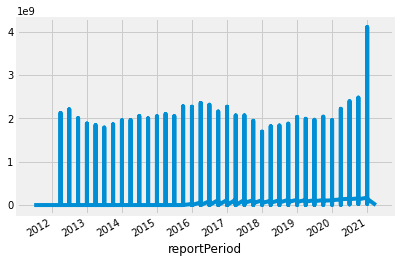

In [ ]:
model_df['trailingVolume1yr'].plot();

In [ ]:
#account for seasonality(not possible with multi_index)
decomp = seasonal_decompose(model_df['trailingVolume1yr'])

decomp.plot();

ValueError: ignored

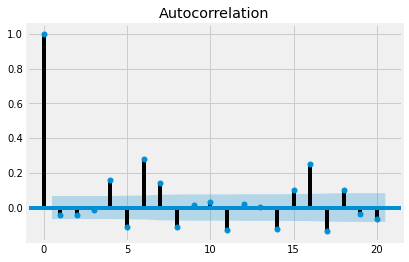

In [ ]:
# check lag corr
plot_acf(model_df['trailingVolume1yr'], lags = 20);

In [ ]:
# slicing into mult-iindex
idx = pd.IndexSlice
multi_index_df.loc[idx[:,'AGR'],:]

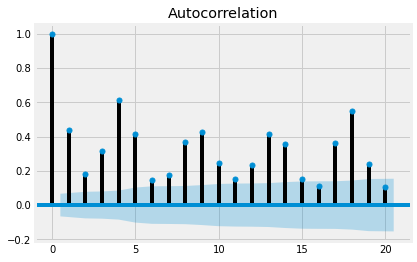

In [ ]:
plot_acf(model_df['Tot_Renew_Prod'], lags = 20);

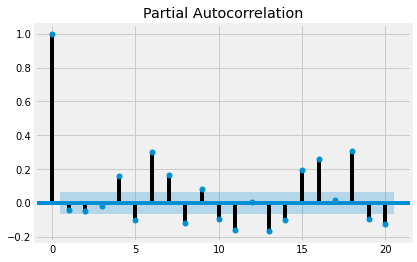

In [ ]:
# lag corr with seasonality accounted for
plot_pacf(model_df['trailingVolume1yr'], lags = 20); # positive lags > 

### Baseline Metrics
#### naive predictions(predict last observed value)

In [ ]:
y_pred = #if we have a validation set(if not get preds normal way)
np.mean(keras.losses.mean_squared_error(y_?, y_pred))

In [ ]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [ ]:
# basic model for linear predictions 
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
# graph to show how well model is learning

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()


In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

#### EIA Data

In [ ]:
eia_df = pd.read_csv('/drive/My Drive/Colab Notebooks/project05_data/eia_data.csv')
eia_df

,Date,Biofuels_Prod,Biofuels_Cons,Total_Biomass_Energy_Prod,Total_Biomass_Energy_Cons,Geothermal_Energy_Cons/Prod,Hydroelectric_Power_Cons/Prod,Solar/PV_Energy_Cons/Prod,Wood_Energy_Prod,Wood_Energy_Cons,Waste_Energy_Cons,Wind_Energy_Cons/Prod,Coal_Prod,Coal_Cons,Crude_Prod,Petro_Cons,Natural_Gas(dry)_Prod,Natural_Gas_Cons,Nucler_Power_Cons/Prod,Tot_FF_Prod,Tot_FF_Cons,Tot_Primary_Prod,Tot_Primary_Cons,Tot_Renew_Prod,Tot_Renew_Cons,Year,Month,Day
0,2011-01-01,167.958,152.130,400.130,384.302,18.480,248.060,5.520,193.637,193.637,38.536,83.077,1853.793,1887.540,987.932,2941.462,1901.499,2947.202,761.181,4977.430,7776.325,6493.879,9286.116,755.268,739.440,2011,1,1
1,2011-02-01,150.317,143.369,359.201,352.253,16.676,234.459,6.363,173.103,173.103,35.781,101.547,1735.779,1559.705,877.535,2637.718,1683.567,2501.940,677.953,4497.827,6699.789,5894.026,8096.616,718.247,711.299,2011,2,1
2,2011-03-01,169.593,158.974,394.547,383.928,18.388,302.503,8.813,186.444,186.444,38.511,102.452,1957.742,1543.832,1009.659,2992.478,1949.824,2274.450,687.083,5160.303,6812.883,6674.089,8324.520,826.703,816.084,2011,3,1
3,2011-04-01,161.701,152.516,373.224,364.039,17.258,303.084,9.997,175.840,175.840,35.683,120.689,1795.399,1420.945,967.040,2811.115,1909.401,1860.165,570.783,4906.208,6092.503,6301.243,7485.847,824.252,815.067,2011,4,1
4,2011-05-01,169.175,163.029,384.288,378.142,18.194,316.615,11.130,177.915,177.915,37.199,114.378,1759.893,1550.327,1010.999,2869.596,1977.417,1698.892,596.583,4995.714,6120.641,6436.903,7568.041,844.606,838.459,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2020-09-01,175.381,173.836,388.217,376.492,17.604,170.637,109.196,179.434,169.253,33.403,205.387,903.198,805.760,1855.917,2683.041,2783.253,2250.075,686.325,6114.611,5738.284,7691.977,7316.687,891.042,879.316,2020,9,1
117,2020-10-01,184.232,172.706,402.184,381.887,17.665,163.146,100.940,182.415,173.644,35.536,257.180,901.086,721.492,1841.613,2811.125,2859.126,2403.777,619.863,6192.063,5935.039,7753.041,7488.975,941.116,920.819,2020,10,1
118,2020-11-01,185.750,173.192,404.827,383.382,18.462,194.413,81.418,184.110,175.224,34.966,300.133,887.947,731.518,1906.663,2707.488,2861.745,2525.033,644.898,6230.121,5961.843,7874.271,7596.195,999.253,977.808,2020,11,1
119,2020-12-01,187.912,178.463,420.978,400.323,18.538,205.584,74.323,195.248,184.042,37.818,289.070,898.660,909.680,1956.135,2796.881,2974.822,3269.329,729.593,6393.190,6974.592,8131.275,8706.771,1008.493,987.838,2020,12,1


## Train-Test Split

Before building a model, we should split our data up into a training and testing set.

Since our goal with time series models is almost always to forecast values forward in time, the idea with a time series train/test split is to train on earlier data and test/evaluate on later data.

Most commonly, we'll set our:
- training set to be the "first" 67% - 80% of our data timewise.
- test set be the "last" 20% - 33% timewise.

Let's split our dataframe by taking the first 80% of rows for training and the rest for testing.

In [ ]:
# assign target variables
X = model_df
y = model_df['trailingVolume1yr']

print(f"X:", X.shape)
print(f"y:", y.shape)

X: (880, 43)
y: (880,)


In [ ]:
# define training / testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Before fitting a model in statsmodels, what do we need
# to do? (Hint: Think intercept.)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [ ]:
print(f"X_train:", X_train.shape)
print(f"y_train:", y_train.shape)
print()
print(f"X_test:", X_test.shape)
print(f"y_test:", y_test.shape)

X_train: (704, 44)
y_train: (704,)

X_test: (176, 44)
y_test: (176,)


In [ ]:
# calculate baseline accuracy
y_preds = model.predict

NameError: ignored

In [ ]:
y_train.value_counts(normalize=True, ascending = False)

### PIPELINE

In [ ]:
# Establish pipeline with two stages: (1) CountVectorizer (transformer) (2) Multinomial Naive Bayes (estimator)
pipe_1 = Pipeline([
  ("cvec", CountVectorizer()),
  ("mnb", MultinomialNB())
])

# Search over the following values of hyperparameters:
pipe_1_params = {
    "cvec__max_features": [500, 750],
    "cvec__ngram_range": [(1,1), (1,2)],
    "cvec__max_df": [0.9, .95, 0.99],
    "cvec__min_df" : [1, 2, 3],
    "cvec__stop_words": [None, "english"],
}

In [ ]:
# GridSearch for best parameters / score
gs_1 = GridSearchCV(pipe_1, param_grid=pipe_1_params, cv=5, n_jobs=8, verbose=1)

In [ ]:
# fit GridSearch to training data
gs_1.fit(X_train, y_train)

In [ ]:
# GS best score (avg of 5 models scored on 5 portions of the dataset)
print(gs_1.best_score_)
print(gs_1.best_params_)

print()

# score model on train / test
print(f"TRAIN SCORE: ", gs_1.score(X_train, y_train))
print(f"TEST SCORE: ", gs_1.score(X_test, y_test))

### Linear Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(model_df.drop(columns = ['trailingVolume1yr']),
                                                    model_df['trailingVolume1yr'],
                                                    test_size = 0.2,
                                                    shuffle = False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(704, 44)
(176, 44)
(704,)
(176,)


In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Confirm.
X_train.head()

,const,Ticker,Sector,Year,Quarter,totalAssets,currentAssets,cashAndEquivalents,shareholdersEquity,totalLiabilities,currentLiabilities,propertyPlantEquipmentNet,shares,tangibleAssetValue,Biofuels_Prod,Biofuels_Cons,Total_Biomass_Energy_Prod,Total_Biomass_Energy_Cons,Geothermal_Energy_Cons/Prod,Hydroelectric_Power_Cons/Prod,Solar/PV_Energy_Cons/Prod,Wood_Energy_Prod,Wood_Energy_Cons,Waste_Energy_Cons,Wind_Energy_Cons/Prod,Coal_Prod,Coal_Cons,Crude_Prod,Petro_Cons,Natural_Gas(dry)_Prod,Natural_Gas_Cons,Nucler_Power_Cons/Prod,Tot_FF_Prod,Tot_FF_Cons,Tot_Primary_Prod,Tot_Primary_Cons,Tot_Renew_Prod,Tot_Renew_Cons,totalVolumeQtr,sharePrice,totalReturnPctQtr,totalReturnPctYr,marketCap,first_diff_vol_1yr,second_diff_vol_1yr
2011-06-30,1.0,AGR,Wind,2011,2,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0,NaN,NaN
2011-06-30,1.0,AMRC,Diversified,2011,2,660579017.0,261652198,69331211,219344219,441234798,124278136,155055412,43070795,639998022.0,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,16003800,14.18,0.0,-0.02,610743886,0.0,NaN
2011-06-30,1.0,AMSC,Wind,2011,2,393662000.0,266123000,140258000,259741000,133921000,130844000,98615000,5086871,387012000.0,498,482,1147,1131,52,932,33,538,538,111,342,5359,4728,2950,8583,5790,5248,1850,14816,18562,19172,22933,2506,2490,16531530,90.40,0.0,27.25,459853146,0.0,0.0
2011-06-30,1.0,AMTX,Biomass,2011,2,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0,0.0,0.0
2011-06-30,1.0,BE,Diversified,2011,2,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.00,0,0.0,0.0


In [ ]:
X_train.dropna(inplace=True)

y_train = y_train[X_train.index]

In [ ]:
# Remember that, in statsmodels, we pass our data 
# in when we instantiate the model!

lm = sm.OLS(y_train, X_train)

ValueError: ignored

In [ ]:
# Then we fit our model.
lm_results = lm.fit()

In [ ]:
# Display our summary!
print(lm_results.summary())

In [ ]:
# Generate predicted test values.
lm_results.predict(X_test)

In [ ]:
# Calculate R2 score.
r2_score(y_test, lm_results.predict(X_test))

In [ ]:
# Calculate RMSE.
mean_squared_error(y_test, lm_results.predict(X_test)) ** 0.5

In [ ]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

### ARIMA model

#####    preprocessing for arima

In [ ]:
model_df['first_diff_vol_1yr'] = model_df['trailingVolume1yr'].diff(1)
model_df['second_diff_vol_1yr'] = model_df['trailingVolume1yr'].diff(1).diff(1)

In [ ]:
def plot_series(df, cols = None, title = 'Title', xlab = None, ylab = None):
    # Set figure size to be (18, 9).
    plt.figure(figsize = (18, 9))
    # Iterate through each column name.
    for col in cols:
        plt.plot(df[col])
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
    # Generate title and labels.
    plt.title(title, fontsize = 26)
    plt.xlabel(xlab, fontsize = 20)
    plt.ylabel(ylab, fontsize = 20)
    # Enlarge tick marks.
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)

In [ ]:
plot_series(model_df, ['trailingVolume1yr'], title = "1yr Trailing Volume")

NameError: ignored

In [ ]:
# Run ADF test on original (non-differenced!) data.
adfuller(model_df['trailingVolume1yr'])

(-1.5775116122941983,
 0.49487953640328713,
 21,
 858,
 {'1%': -3.4379944895149097,
  '10%': -2.5685668227188505,
  '5%': -2.864914462846141},
 35516.872532132154)

In [ ]:
# Code written by Joseph Nelson.
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

1st test: 
Test Statistic   -4.882953
p-value           0.000038
dtype: float64

In [ ]:
# Run ADF test on original (non-differenced!) data.
interpret_dftest(adfuller(model_df['trailingVolume1yr']))

Test Statistic   -1.577512
p-value           0.494880
dtype: float64

In [ ]:
# Run the ADF test on our once-differenced data.
interpret_dftest(adfuller(model_df['first_diff_vol_1yr'].dropna()))

Test Statistic   -1.791207e+01
p-value           2.927063e-30
dtype: float64

In [ ]:
# Run the ADF test on our twice-differenced data.
interpret_dftest(adfuller(model_df['second_diff_vol_1yr'].dropna()))

Test Statistic   -22.602178
p-value            0.000000
dtype: float64

##### fit arima model

In [ ]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p},1,{q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
                          order = (p,1,q)) # values of p, d, q
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q
        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0,1,0)
The AIC for ARIMA(0,1,0) is: 674862.0253131794
Attempting to fit ARIMA(0,1,1)
The AIC for ARIMA(0,1,1) is: 662554.1077481989
Attempting to fit ARIMA(0,1,2)
Attempting to fit ARIMA(0,1,3)
Attempting to fit ARIMA(0,1,4)
Attempting to fit ARIMA(1,1,0)
The AIC for ARIMA(1,1,0) is: 671096.9598628283
Attempting to fit ARIMA(1,1,1)
The AIC for ARIMA(1,1,1) is: 662365.9425439683
Attempting to fit ARIMA(1,1,2)
Attempting to fit ARIMA(1,1,3)
The AIC for ARIMA(1,1,3) is: 661732.0325502793
Attempting to fit ARIMA(1,1,4)
The AIC for ARIMA(1,1,4) is: 661009.60085093
Attempting to fit ARIMA(2,1,0)
The AIC for ARIMA(2,1,0) is: 668294.594149609
Attempting to fit ARIMA(2,1,1)
The AIC for ARIMA(2,1,1) is: 661708.41831474
Attempting to fit ARIMA(2,1,2)
The AIC for ARIMA(2,1,2) is: 661635.5732236439
Attempting to fit ARIMA(2,1,3)
The AIC for ARIMA(2,1,3) is: 658844.4127179569
Attempting to fit ARIMA(2,1,4)
The AIC for ARIMA(2,1,4) is: 658313.898028271
Attempting to fit ARIMA(

In [ ]:
model.evaluate(X_test, y_test)

ARIMA models are among the most common approaches to time series modeling.
* Highly flexible; it can model time series with varying characteristics.
* It takes information from both long-term trends and sudden shocks!
* Can easily be extended into more advanced models.
* Seasonal ARIMA.
* ARIMA with eXogenous Predictors. (Independent X variables.)
* Vector ARIMA models. (Multiple Y variables simultaneously.)
* Tends to perform well with moderate amounts of data, but may be outperformed by deep learning methods (RNN) with lots of data. (Side note: It can be hard to get lots of time series data!)
* ARIMA models are best suited for short-term forecasts, but very quickly will start predicting the mean. Some of the extensions to ARIMA models can handle this better.

In [ ]:
idx = pd.IndexSlice
#multi_index_df.loc[idx[:,'AGR'],:]

In [ ]:
y_test.head()

reportPeriod
2019-06-30    111212700
2019-06-30     32180800
2019-06-30     69907000
2019-06-30     51091700
2019-06-30    239194500
Name: trailingVolume1yr, dtype: int64

In [ ]:
y_test.tail()

reportPeriod
2021-03-31    0
2021-03-31    0
2021-03-31    0
2021-03-31    0
2021-03-31    0
Name: trailingVolume1yr, dtype: int64

In [ ]:
y_test.index[0]

Timestamp('2019-06-30 00:00:00')

In [ ]:
df.loc(axis=0)[pd.IndexSlice[:, 't']]

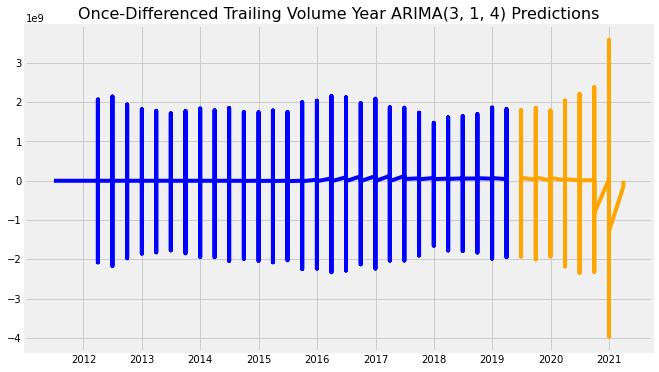

In [ ]:
# Instantiate best model.
model = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
              order = (3,1,4))

# Fit ARIMA model.
arima = model.fit()

# Generate predictions based on test set.
#preds = model.predict(params = arima.params,
#                      start = y_test.index[0],
#                      end = y_test.index[-1]
#)
# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train).diff(), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test).diff(), color = 'orange')

# Plot predicted test values.
#plt.plot(y_test.index, preds, color = 'green')

plt.title(label = 'Once-Differenced Trailing Volume Year ARIMA(3, 1, 4) Predictions', fontsize=16)
plt.show();

In [ ]:
from statsmodels.tsa.arima_model import ARIMAResults

In [ ]:
sm_constant = sm.add_constant(X_train)
est = ARIMAResults(y_train, sm_constant)
est_fit = est.fit()
est_fit.summary()

In [ ]:
model.summary()

### VAR

In [ ]:
model_df.columns

Index(['Ticker', 'Sector', 'Year', 'Quarter', 'totalAssets', 'currentAssets',
       'cashAndEquivalents', 'shareholdersEquity', 'totalLiabilities',
       'currentLiabilities', 'propertyPlantEquipmentNet', 'shares',
       'tangibleAssetValue', 'Biofuels_Prod', 'Biofuels_Cons',
       'Total_Biomass_Energy_Prod', 'Total_Biomass_Energy_Cons',
       'Geothermal_Energy_Cons/Prod', 'Hydroelectric_Power_Cons/Prod',
       'Solar/PV_Energy_Cons/Prod', 'Wood_Energy_Prod', 'Wood_Energy_Cons',
       'Waste_Energy_Cons', 'Wind_Energy_Cons/Prod', 'Coal_Prod', 'Coal_Cons',
       'Crude_Prod', 'Petro_Cons', 'Natural_Gas(dry)_Prod', 'Natural_Gas_Cons',
       'Nucler_Power_Cons/Prod', 'Tot_FF_Prod', 'Tot_FF_Cons',
       'Tot_Primary_Prod', 'Tot_Primary_Cons', 'Tot_Renew_Prod',
       'Tot_Renew_Cons', 'totalVolumeQtr', 'trailingVolume1yr', 'sharePrice',
       'totalReturnPctQtr', 'totalReturnPctYr', 'marketCap',
       'first_diff_vol_1yr', 'second_diff_vol_1yr'],
      dtype='object')

In [ ]:
dates = model_df[['Year', 'Quarter']].astype(int).astype(str)

quarterly = dates["Year"] + "Q" + dates["Quarter"]

from statsmodels.tsa.base.datetools import dates_from_str

quarterly = dates_from_str(quarterly)

#mdata = mdata[['realgdp','realcons','realinv']]

model_df.index = pd.DatetimeIndex(quarterly)

data = np.log(model_df).diff().dropna()

TypeError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
var_model = VAR(train)

ValueError: ignored

# Tensorflow and Keras

In [ ]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

### RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
master_knn = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

NameError: ignored

In [ ]:
# more complicated model
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))


### Deep RNN with layer norm

In [ ]:
from tensorflow.keras.layers import LayerNormalization

In [ ]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = LayerNormalization()
        self.activation = keras.activations.get(activation)
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]



In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

## LTSM model

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

# forecasting several steps ahead

In [ ]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

In [ ]:
Y_pred.shape

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
save_fig("forecast_ahead_plot")
plt.show()

## Model evaluation

###   model evaluation for tensorflow/keras

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
# graph to show how well model is learning

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()



### Plot predictions

In [ ]:
# Let's plot our predictions! 

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Forecasting Airline Passengers 1958-1961', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);